In [4]:
import warnings
warnings.filterwarnings("ignore")

Converting RGB Image to Greyscale

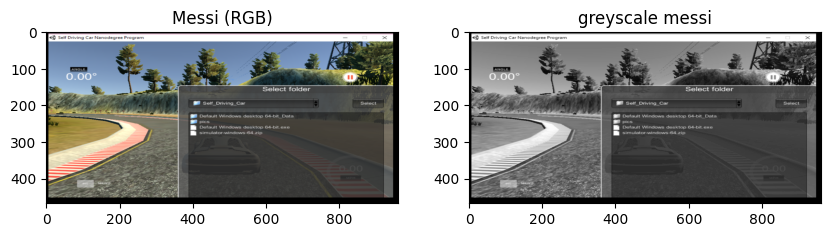

In [6]:
import cv2
import matplotlib.pyplot as plt
image=cv2.imread("D:\cvlab\self.png")
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title('Messi (RGB)')
image_grey=cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
plt.subplot(1,2,2)
plt.imshow(image_grey,cmap='gray')
plt.title('greyscale messi')
plt.show()

Minimum and Maximum Pixel Intensity with Image

Minimum pixel intensity: 0.0
Maximum pixel intensity: 255.0


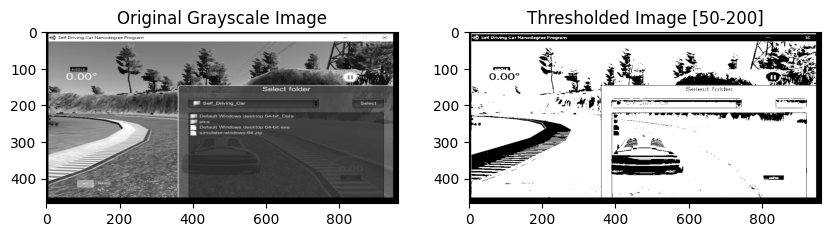

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread("D:\cvlab\self.png")

# Step 2: Convert the image to grayscale (if it's not already grayscale)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Find the minimum and maximum pixel intensity values
min_val, max_val, _, _ = cv2.minMaxLoc(gray_image)
print(f"Minimum pixel intensity: {min_val}")
print(f"Maximum pixel intensity: {max_val}")

# Step 4: Apply manual threshold (you can change the threshold values)
threshold_min = 50  # Set your own minimum threshold value
threshold_max = 200  # Set your own maximum threshold value

# Apply thresholding
_, binary_image = cv2.threshold(gray_image, threshold_min, 255, cv2.THRESH_BINARY)
_, binary_max = cv2.threshold(gray_image, threshold_max, 255, cv2.THRESH_BINARY_INV)

# Combine the two thresholds
thresholded_image = cv2.bitwise_and(binary_image, binary_max)

# Step 5: Display the original and thresholded images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(gray_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Thresholded Image [{threshold_min}-{threshold_max}]')
plt.imshow(thresholded_image, cmap='gray')

plt.show()

Augmentation of Image

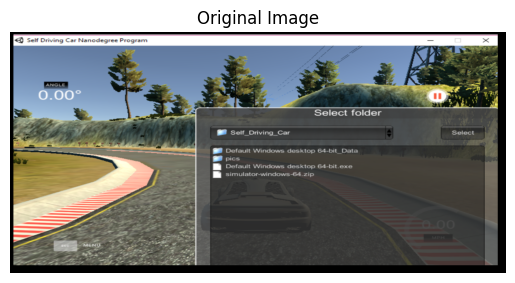

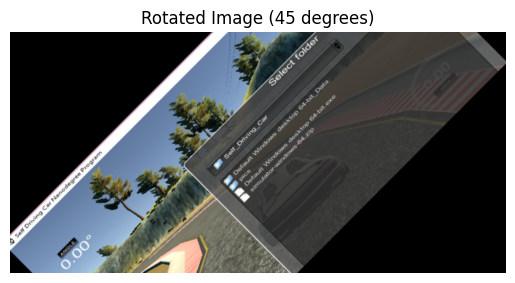

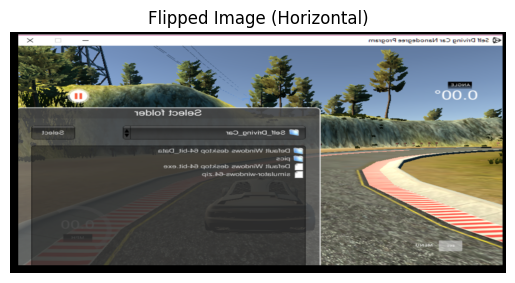

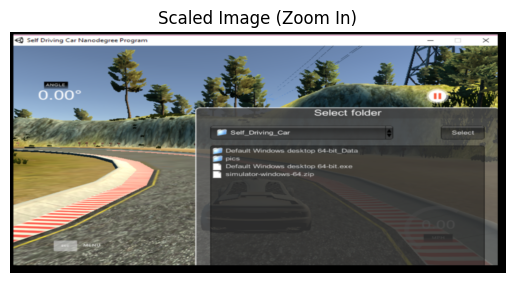

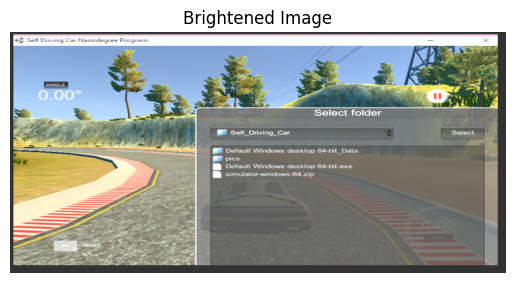

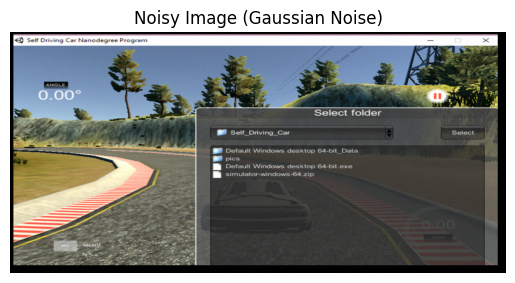

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("D:\cvlab\self.png")

# Function to display images using matplotlib (for better visualization)
def show_image(img, title="Image"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR (OpenCV) to RGB (for Matplotlib)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Augmentation 1: Rotate the image
def rotate_image(img, angle):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(img, rotation_matrix, (w, h))
    return rotated_image

# Augmentation 2: Flip the image
def flip_image(img, flip_code):
    flipped_image = cv2.flip(img, flip_code)
    return flipped_image

# Augmentation 3: Scale the image (zoom in/out)
def scale_image(img, scale_factor):
    h, w = img.shape[:2]
    scaled_image = cv2.resize(img, (int(w * scale_factor), int(h * scale_factor)))
    return scaled_image

# Augmentation 4: Adjust brightness
def adjust_brightness(img, value):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)
    v = np.clip(v, 0, 255)
    hsv = cv2.merge((h, s, v))
    bright_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return bright_image

# Augmentation 5: Add Gaussian noise
def add_gaussian_noise(img, mean=0, var=10):
    sigma = var ** 0.5
    gaussian = np.random.normal(mean, sigma, img.shape)
    noisy_image = img + gaussian
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# Display original image
show_image(image, "Original Image")

# Apply augmentations
rotated_image = rotate_image(image, 45)
show_image(rotated_image, "Rotated Image (45 degrees)")

flipped_image = flip_image(image, 1)  # 0: vertical, 1: horizontal, -1: both
show_image(flipped_image, "Flipped Image (Horizontal)")

scaled_image = scale_image(image, 1.5)  # Scaling factor > 1 for zoom in, < 1 for zoom out
show_image(scaled_image, "Scaled Image (Zoom In)")

bright_image = adjust_brightness(image, 50)  # Adjust brightness by 50
show_image(bright_image, "Brightened Image")

noisy_image = add_gaussian_noise(image)
show_image(noisy_image, "Noisy Image (Gaussian Noise)")

Adjusted Image

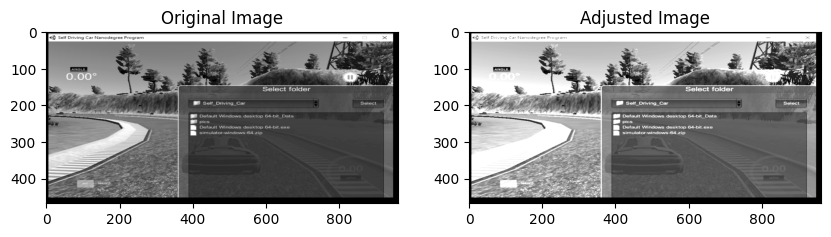

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image (replace 'image.jpg' with your image file)
image = cv2.imread("D:\cvlab\self.png", cv2.IMREAD_GRAYSCALE)  # Read as grayscale

# Increase contrast (adjust the contrast factor as needed)
contrast_factor = 1.5  # You can experiment with different values

# Apply contrast adjustment
adjusted_image = cv2.convertScaleAbs(image, alpha=contrast_factor, beta=0)

# Display the original and adjusted images
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(adjusted_image, cmap='gray'), plt.title('Adjusted Image')
plt.show()

Denoising the Image

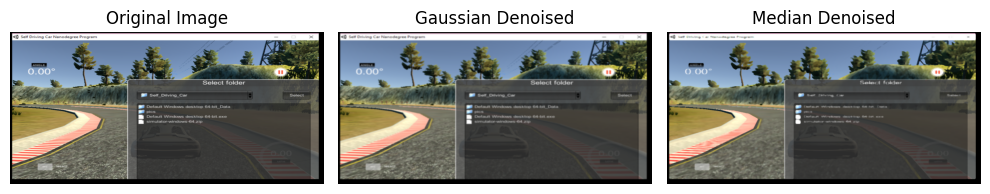

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("D:\cvlab\self.png")

# Convert the image to RGB (OpenCV loads images in BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Gaussian filter for denoising
gaussian_denoised = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Apply Median filter for denoising
median_denoised = cv2.medianBlur(image_rgb, 5)

# Display the original and denoised images using matplotlib
plt.figure(figsize=(10, 7))

# Display the original image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Display the image denoised by Gaussian filter
plt.subplot(1, 3, 2)
plt.imshow(gaussian_denoised)
plt.title("Gaussian Denoised")
plt.axis('off')

# Display the image denoised by Median filter
plt.subplot(1, 3, 3)
plt.imshow(median_denoised)
plt.title("Median Denoised")
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

Histogram of the Pixel Values

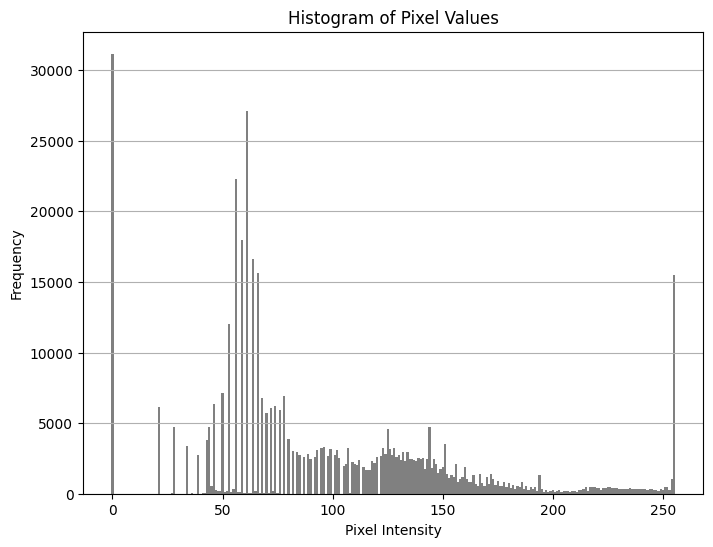

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image (replace 'image.jpg' with your image file)
image = cv2.imread("D:\cvlab\self.png", cv2.IMREAD_GRAYSCALE)  # Read as grayscale

# Calculate the histogram
hist, bins = np.histogram(image.ravel(), bins=256, range=[0, 256])

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(bins[:-1], hist, width=1, color='gray')
plt.title('Histogram of Pixel Values')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

Equalized Image

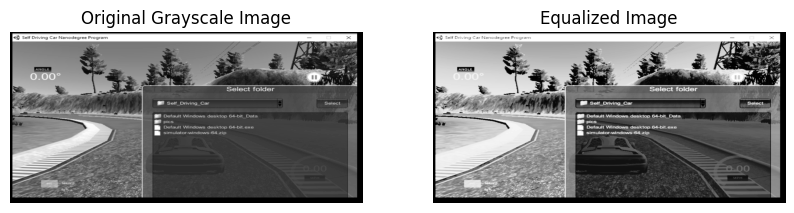

True

In [28]:
import cv2
import matplotlib.pyplot as plt

# Read the normal image
image = cv2.imread("D:\cvlab\self.png")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Display the original grayscale and equalized images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

# Optionally, save the equalized image
cv2.imwrite('equalized_image.jpg', equalized_image)

Histogram for Equalized Image

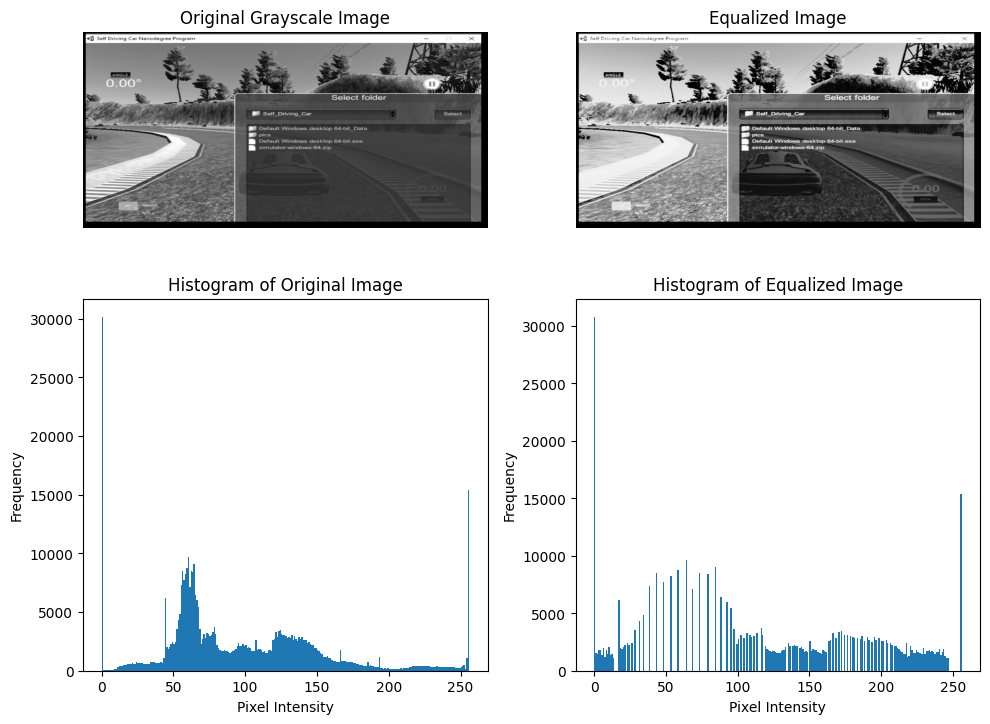

True

In [31]:
import cv2
import matplotlib.pyplot as plt

# Read the normal image
image = cv2.imread("D:\cvlab\self.png")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Display the original grayscale and equalized images side by side
plt.figure(figsize=(10, 8))

# Original grayscale image
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Equalized image
plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Histogram for original grayscale image
plt.subplot(2, 2, 3)
plt.hist(gray_image.ravel(), 256, [0, 256])
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Histogram for equalized image
plt.subplot(2, 2, 4)
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

# Optionally, save the equalized image
cv2.imwrite('equalized_image.jpg', equalized_image)

Clahe Image

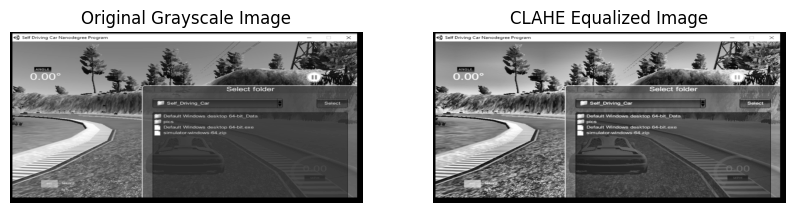

True

In [34]:
import cv2
import matplotlib.pyplot as plt

# Read the normal image
image = cv2.imread("D:\cvlab\self.png")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a CLAHE object (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the grayscale image
clahe_image = clahe.apply(gray_image)

# Display the original grayscale and CLAHE equalized images side by side
plt.figure(figsize=(10, 5))

# Original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# CLAHE equalized image
plt.subplot(1, 2, 2)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Equalized Image')
plt.axis('off')

plt.show()

# Optionally, save the CLAHE equalized image
cv2.imwrite('clahe_image.jpg', clahe_image)

Histogram for Clahe Image

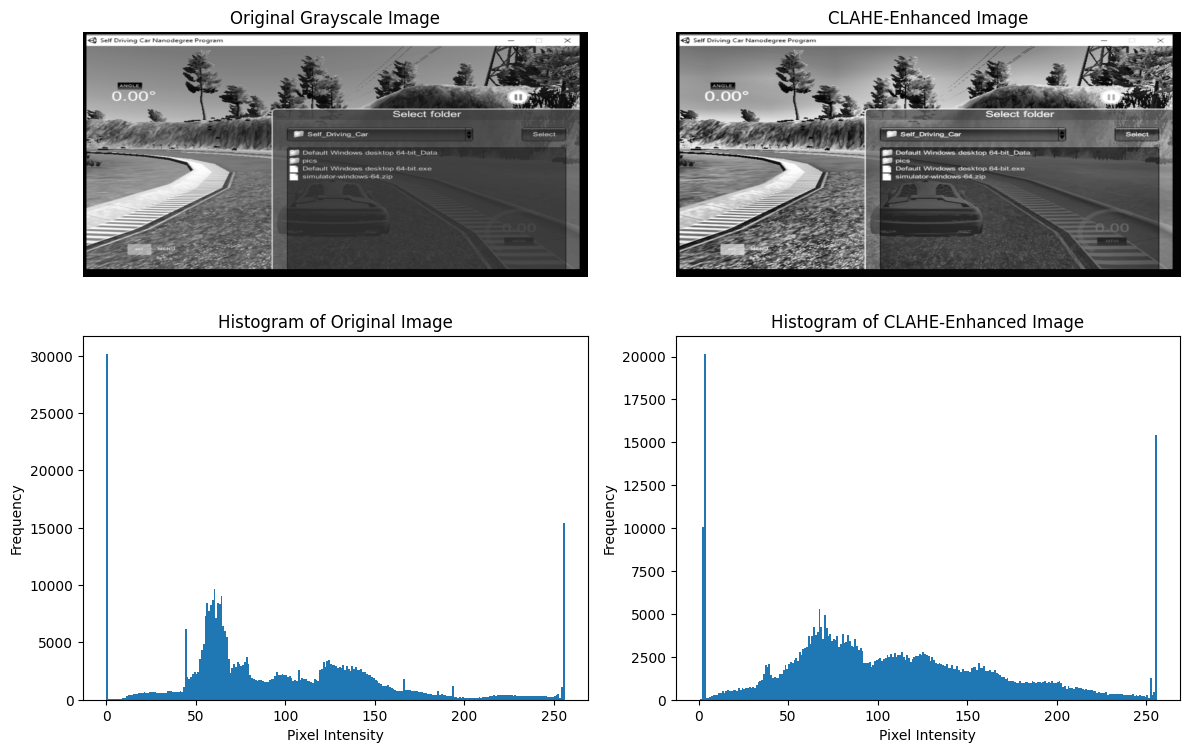

In [37]:

import cv2
import matplotlib.pyplot as plt

# Read the original image
image = cv2.imread("D:\cvlab\self.png")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(gray_image)

# Plot the original and CLAHE images with their histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Display the original grayscale image
axs[0, 0].imshow(gray_image, cmap='gray')
axs[0, 0].set_title('Original Grayscale Image')
axs[0, 0].axis('off')

# Display the CLAHE-enhanced image
axs[0, 1].imshow(clahe_image, cmap='gray')
axs[0, 1].set_title('CLAHE-Enhanced Image')
axs[0, 1].axis('off')

# Plot the histogram of the original grayscale image
axs[1, 0].hist(gray_image.ravel(), bins=256, range=[0, 256])
axs[1, 0].set_title('Histogram of Original Image')
axs[1, 0].set_xlabel('Pixel Intensity')
axs[1, 0].set_ylabel('Frequency')

# Plot the histogram of the CLAHE-enhanced image
axs[1, 1].hist(clahe_image.ravel(), bins=256, range=[0, 256])
axs[1, 1].set_title('Histogram of CLAHE-Enhanced Image')
axs[1, 1].set_xlabel('Pixel Intensity')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

Histogram for Denoised Image

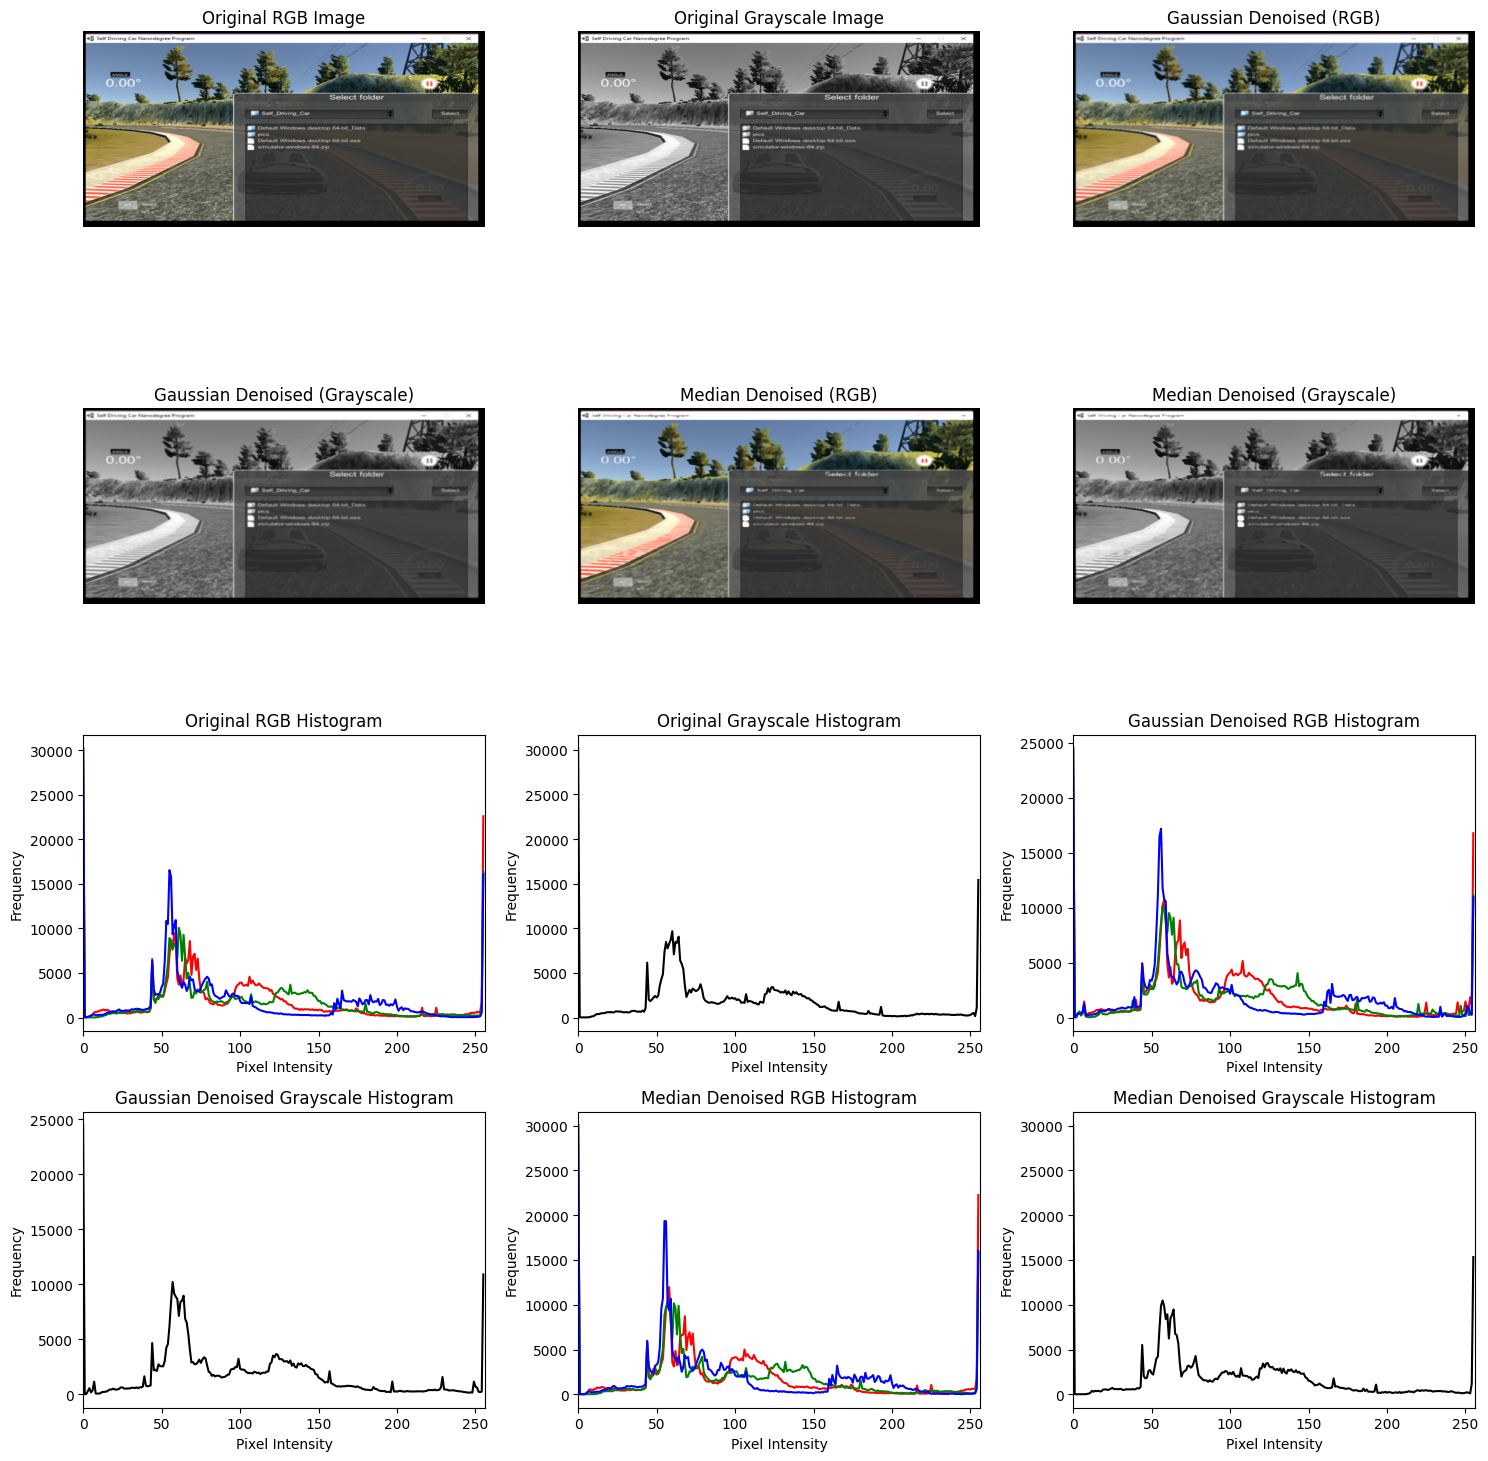

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("D:\cvlab\self.png")

# Convert the image to RGB (OpenCV loads images in BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian filter for denoising (color and grayscale)
gaussian_denoised = cv2.GaussianBlur(image_rgb, (5, 5), 0)
gaussian_denoised_gray = cv2.GaussianBlur(image_gray, (5, 5), 0)

# Apply Median filter for denoising (color and grayscale)
median_denoised = cv2.medianBlur(image_rgb, 5)
median_denoised_gray = cv2.medianBlur(image_gray, 5)

# Function to plot histogram (for grayscale images)
def plot_histogram_gray(image, title):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist, color='black')
    plt.xlim([0, 256])
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

# Function to plot histogram (for RGB images)
def plot_histogram(image, title):
    color = ('r', 'g', 'b')
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

# Display the images and their histograms
plt.figure(figsize=(15, 15))

# Display the original image (RGB)
plt.subplot(4, 3, 1)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis('off')

# Display the original image (Grayscale)
plt.subplot(4, 3, 2)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

# Display the Gaussian denoised (RGB)
plt.subplot(4, 3, 3)
plt.imshow(gaussian_denoised)
plt.title("Gaussian Denoised (RGB)")
plt.axis('off')

# Display the Gaussian denoised (Grayscale)
plt.subplot(4, 3, 4)
plt.imshow(gaussian_denoised_gray, cmap='gray')
plt.title("Gaussian Denoised (Grayscale)")
plt.axis('off')

# Display the Median denoised (RGB)
plt.subplot(4, 3, 5)
plt.imshow(median_denoised)
plt.title("Median Denoised (RGB)")
plt.axis('off')

# Display the Median denoised (Grayscale)
plt.subplot(4, 3, 6)
plt.imshow(median_denoised_gray, cmap='gray')
plt.title("Median Denoised (Grayscale)")
plt.axis('off')

# Plot histogram for original RGB image
plt.subplot(4, 3, 7)
plot_histogram(image_rgb, 'Original RGB Histogram')

# Plot histogram for original Grayscale image
plt.subplot(4, 3, 8)
plot_histogram_gray(image_gray, 'Original Grayscale Histogram')

# Plot histogram for Gaussian denoised (RGB)
plt.subplot(4, 3, 9)
plot_histogram(gaussian_denoised, 'Gaussian Denoised RGB Histogram')

# Plot histogram for Gaussian denoised (Grayscale)
plt.subplot(4, 3, 10)
plot_histogram_gray(gaussian_denoised_gray, 'Gaussian Denoised Grayscale Histogram')

# Plot histogram for Median denoised (RGB)
plt.subplot(4, 3, 11)
plot_histogram(median_denoised, 'Median Denoised RGB Histogram')

# Plot histogram for Median denoised (Grayscale)
plt.subplot(4, 3, 12)
plot_histogram_gray(median_denoised_gray, 'Median Denoised Grayscale Histogram')

# Show the plots
plt.tight_layout()
plt.show()